In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel("2021 India Forest Cover.xlsx")
data.head()

,State,Geographical Area,Very dense forest,Mod. dense forest,Open forest,Total Forest,% of geographical area,Scrub
0,Andhra Pradesh,162968,1994.0,13929.0,13861.0,29784.0,18.28,8276.0
1,Arunachal Pradesh,83743,21058.0,30176.0,15197.0,66431.0,79.33,797.0
2,Assam,78438,3017.0,9991.0,15304.0,28312.0,36.09,228.0
3,Bihar,94163,333.0,3286.0,3762.0,7381.0,7.84,236.0
4,Chhattisgarh,135192,7068.0,32279.0,16370.0,55717.0,41.21,615.0


In [3]:
data = data[data['State'] != 'Total']

In [4]:
len(data)

36

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   36 non-null     object 
 1   Geographical Area       36 non-null     int64  
 2   Very dense forest       36 non-null     float64
 3   Mod. dense forest       36 non-null     float64
 4   Open forest             36 non-null     float64
 5   Total Forest            36 non-null     float64
 6   % of geographical area  36 non-null     float64
 7   Scrub                   36 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.5+ KB


In [6]:
data.isna().sum()

State                     0
Geographical Area         0
Very dense forest         0
Mod. dense forest         0
Open forest               0
Total Forest              0
% of geographical area    0
Scrub                     0
dtype: int64

<Axes: >

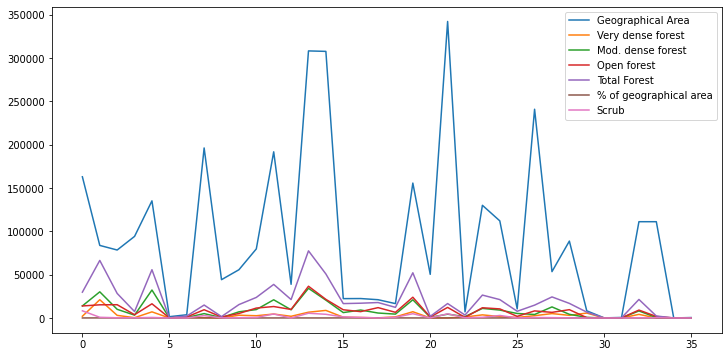

In [7]:
data.plot(figsize=(12,6))

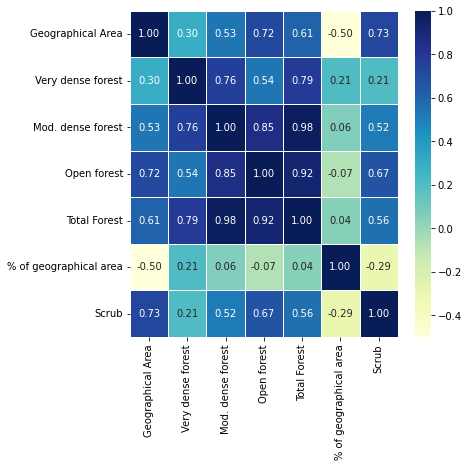

In [8]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [9]:
pd.api.types.is_string_dtype(data["State"])

True

In [10]:
# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State


In [11]:
# This will convert all strings to category
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

In [12]:
data["State"].cat.categories

Index(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli and Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [13]:
data['StateCodes'] = data["State"].cat.codes

In [14]:
X = data.drop(columns=["Total Forest","State"],axis=1)
y = data["Total Forest"]

In [15]:
X.head()

,Geographical Area,Very dense forest,Mod. dense forest,Open forest,% of geographical area,Scrub,StateCodes
0,162968,1994.0,13929.0,13861.0,18.28,8276.0,1
1,83743,21058.0,30176.0,15197.0,79.33,797.0,2
2,78438,3017.0,9991.0,15304.0,36.09,228.0,3
3,94163,333.0,3286.0,3762.0,7.84,236.0,4
4,135192,7068.0,32279.0,16370.0,41.21,615.0,6


In [16]:
y.head()

0    29784.0
1    66431.0
2    28312.0
3     7381.0
4    55717.0
Name: Total Forest, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest regression

In [18]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.8338384333765614

#### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

1.0

#### Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor(random_state=42)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8580502071187239

#### Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

model4 = Ridge(random_state=42)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

1.0

#### XG Boost

In [22]:
import xgboost as xgb

model5 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model5.fit(X_train,y_train)
model5.score(X_test,y_test)             

[12:04:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.4289768211773317

In [27]:
y_preds_3 = model3.predict(X)
scores_3 = pd.DataFrame(columns=["Actual Total forest area","Predicted Total forest area"])
scores_3["Actual Total forest area"] = y
scores_3["Predicted Total forest area"] = y_preds_3
scores_3.head(10)


,Actual Total forest area,Predicted Total forest area
0,29784.0,29783.957348
1,66431.0,66427.243252
2,28312.0,28308.440873
3,7381.0,7371.631435
4,55717.0,55716.552642
5,195.0,198.619687
6,2244.0,2249.725137
7,14926.0,14934.279990
8,1603.0,1597.053329
9,15443.0,15465.462806


Text(0, 0.5, 'Total forest area')

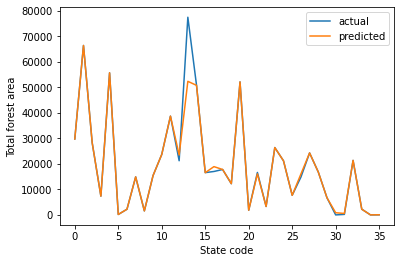

In [29]:
plt.plot(scores_3["Actual Total forest area"], label='actual')
plt.plot(scores_3["Predicted Total forest area"], label='predicted')
plt.legend()
plt.xlabel("State code")
plt.ylabel("Total forest area")

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse= mean_squared_error(y, y_preds_3)
rmse= r2_score(y, y_preds_3)
mae = mean_absolute_error(y,y_preds_3)

mse,rmse,mae

(17832017.44175101, 0.9525608663336488, 903.5404514702077)

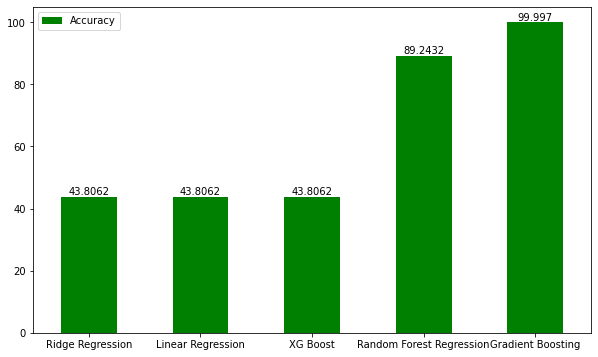

In [26]:
model_score = {'Ridge Regression':43.8062,
               'Linear Regression':43.8062,
               'XG Boost':43.8062,
               'Random Forest Regression':89.2432,
               'Gradient Boosting':99.9970}

model_compare = pd.DataFrame(model_score, index=["Accuracy"])
ax = model_compare.T.plot.bar(color="green", figsize=(10,6));
plt.bar_label(ax.containers[0])
plt.xticks(rotation=0);